In [6]:
# Upgrade pandas profiling
!pip install pandas-profiling --upgrade

In [7]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [8]:
# Loading data
data=pd.read_csv("/content/Netflix Dataset Latest 2021.csv")
data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Unnamed: 29,Unnamed: 30
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,NaN,NaN
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,NaN,NaN
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube,NaN,NaN
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube,NaN,NaN


In [9]:
# About data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  9425 non-null   object 
 1   Genre                  9400 non-null   object 
 2   Tags                   9389 non-null   object 
 3   Languages              9266 non-null   object 
 4   Series or Movie        9425 non-null   object 
 5   Hidden Gem Score       9415 non-null   float64
 6   Country Availability   9414 non-null   object 
 7   Runtime                9424 non-null   object 
 8   Director               7120 non-null   object 
 9   Writer                 7615 non-null   object 
 10  Actors                 9314 non-null   object 
 11  View Rating            6827 non-null   object 
 12  IMDb Score             9417 non-null   float64
 13  Rotten Tomatoes Score  5445 non-null   float64
 14  Metacritic Score       4082 non-null   float64
 15  Awar

In [10]:
# Data mathematical information
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes,Unnamed: 29,Unnamed: 30
count,9415.000000,9417.000000,5445.000000,4082.000000,5226.000000,6376.000000,9.415000e+03,0.0,0.0
mean,5.540733,6.955517,64.691276,58.113425,9.735936,16.035602,6.014725e+04,NaN,NaN
std,2.447462,0.899681,25.269466,17.143187,19.524116,32.209094,1.463837e+05,NaN,NaN
min,0.600000,1.600000,0.000000,6.000000,1.000000,1.000000,5.000000e+00,NaN,NaN
25%,3.400000,6.500000,49.000000,46.000000,1.250000,2.000000,9.695000e+02,NaN,NaN
50%,5.300000,7.000000,70.000000,59.000000,4.000000,6.000000,6.602000e+03,NaN,NaN
75%,8.100000,7.500000,85.000000,71.000000,9.000000,15.000000,5.098700e+04,NaN,NaN
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06,NaN,NaN


In [11]:
# Pandas profiling before data preprocessing
profile = ProfileReport(data, title='Pandas profiling before data preprcessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [12]:
# Convering pandas profiling info to html file
profile.to_file('data_train_before_preprocessing.html')

In [13]:
# Check for null values
data.isnull().sum()

Title                       0
Genre                      25
Tags                       36
Languages                 159
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
Unnamed: 29              9425
Unnamed: 30              9425
dtype: int64

In [14]:
# Print unique values
print(data.nunique())

Title                    9166
Genre                    1531
Tags                     8552
Languages                1209
Series or Movie             2
Hidden Gem Score           93
Country Availability     5281
Runtime                     4
Director                 4252
Writer                   6524
Actors                   8835
View Rating                24
IMDb Score                 72
Rotten Tomatoes Score     101
Metacritic Score           92
Awards Received           130
Awards Nominated For      200
Boxoffice                3589
Release Date             4358
Netflix Release Date     1642
Production House         3276
Netflix Link             9425
IMDb Link                8826
Summary                  9415
IMDb Votes               6991
Image                    9425
Poster                   8347
TMDb Trailer             9110
Trailer Site                2
Unnamed: 29                 0
Unnamed: 30                 0
dtype: int64


In [15]:
data.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [16]:
data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Unnamed: 29,Unnamed: 30
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,NaN,NaN
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,NaN,NaN
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube,NaN,NaN
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube,NaN,NaN


#Exploratory Data Analysis

counting the most used language in movies and series

In [17]:
import pandas as pd

# Group the media files by file format and count the number of titles in each group
file_format_counts = data.groupby('Languages')['Series or Movie'].count()

# Find the file format with the highest count
most_used_file_format = file_format_counts.idxmax()
least_used_file_format = file_format_counts.idxmin()

print(f"The most used Languages in movies and TV series is {most_used_file_format}")
print(f"The least used Languages in movies and TV series is {least_used_file_format}")

The most used Languages in movies and TV series is English
The least used Languages in movies and TV series is Afrikaans


making a plot for the 5 most used languages

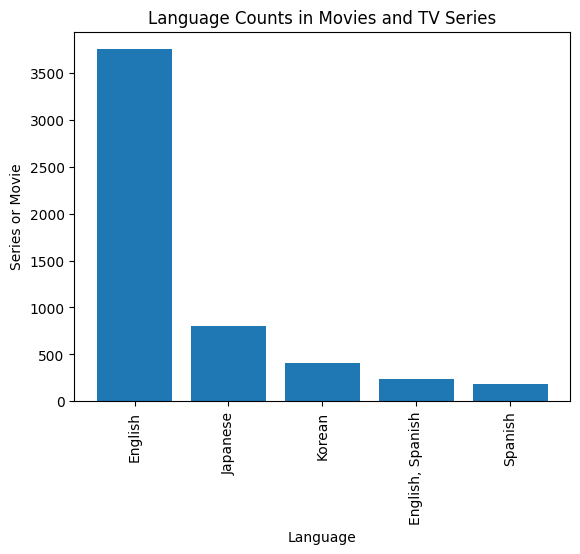

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the media files by file format and count the number of titles in each group
file_format_counts = data.groupby('Languages')['Series or Movie'].count()

# Sort the language counts in descending order
file_format_counts = file_format_counts.sort_values(ascending=False)[:5]

# Create a bar plot of the language counts
plt.bar(file_format_counts.index, file_format_counts.values)

# Set the plot title and axis labels
plt.title('Language Counts in Movies and TV Series')
plt.xlabel('Language')
plt.ylabel('Series or Movie')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

what catagory has more views

In [19]:
import pandas as pd

# Group the media files by file format and count the number of titles in each group
file_format_counts = data.groupby('Series or Movie').count()

# Find the file format with the highest count
most_used_file_format = file_format_counts.idxmax()
least_used_file_format = file_format_counts.idxmin()

print(f"The most viewed in movies and TV series is {most_used_file_format}")
print(f"The least viewed  in movies and TV series is {least_used_file_format}")

The most viewed in movies and TV series is Title                    Movie
Genre                    Movie
Tags                     Movie
Languages                Movie
Hidden Gem Score         Movie
Country Availability     Movie
Runtime                  Movie
Director                 Movie
Writer                   Movie
Actors                   Movie
View Rating              Movie
IMDb Score               Movie
Rotten Tomatoes Score    Movie
Metacritic Score         Movie
Awards Received          Movie
Awards Nominated For     Movie
Boxoffice                Movie
Release Date             Movie
Netflix Release Date     Movie
Production House         Movie
Netflix Link             Movie
IMDb Link                Movie
Summary                  Movie
IMDb Votes               Movie
Image                    Movie
Poster                   Movie
TMDb Trailer             Movie
Trailer Site             Movie
Unnamed: 29              Movie
Unnamed: 30              Movie
dtype: object
The least vie

writers who has the highest ratings on their movies

In [20]:
import pandas as pd

# Group the movies by writer and calculate the mean Hidden Gem Score for each group
writer_mean_scores = data.groupby('Writer')['Hidden Gem Score'].mean()

# Sort the writer mean scores in descending order and take the top writer
top_writer_mean_score = writer_mean_scores.sort_values(ascending=False).iloc[0]

# Find the writer with the highest Hidden Gem Score
top_writer = writer_mean_scores[writer_mean_scores == top_writer_mean_score].index[0]

# Print the writer with the highest Hidden Gem Score
print("The writer with the highest Hidden Gem Score is:", top_writer)

The writer with the highest Hidden Gem Score is: Andy Daniluc


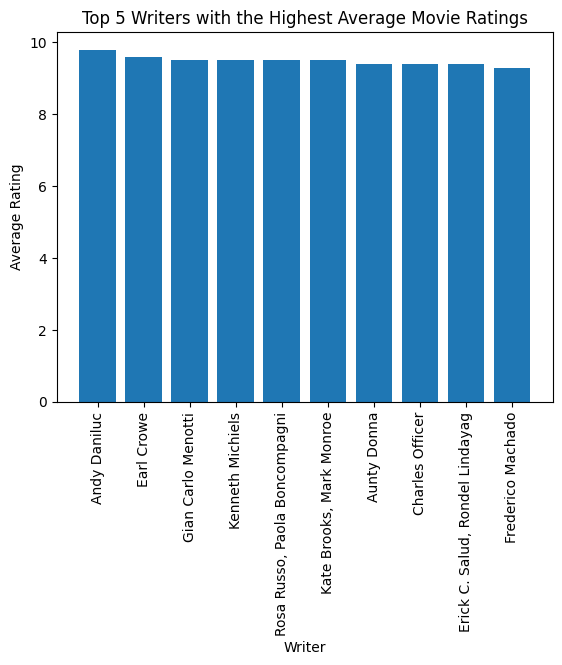

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the movies by writer and calculate the mean rating for each group
writer_mean_ratings = data.groupby('Writer')['Hidden Gem Score'].mean()

# Sort the writer mean ratings in descending order and take the top 5
top_writer_mean_ratings = writer_mean_ratings.sort_values(ascending=False)[:10]

# Create a bar plot of the top 5 writer mean ratings
plt.bar(top_writer_mean_ratings.index, top_writer_mean_ratings.values)
plt.title('Top 5 Writers with the Highest Average Movie Ratings')
plt.xlabel('Writer')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

genre with the highest ratings

In [22]:
import pandas as pd

# Group the movies by genre and calculate the mean Hidden Gem Score for each group
genre_mean_scores = data.groupby('Genre')['Hidden Gem Score'].mean()

# Sort the genre mean scores in descending order and take the top genre
top_genre_mean_score = genre_mean_scores.sort_values(ascending=False).iloc[0]

# Find the genre with the highest Hidden Gem Score
top_genre = genre_mean_scores[genre_mean_scores == top_genre_mean_score].index[0]

# Print the genre with the highest Hidden Gem Score
print("The genre with the highest Hidden Gem Score is:", top_genre)

The genre with the highest Hidden Gem Score is: Comedy, Crime, Drama, Family, Mystery, Romance, Thriller


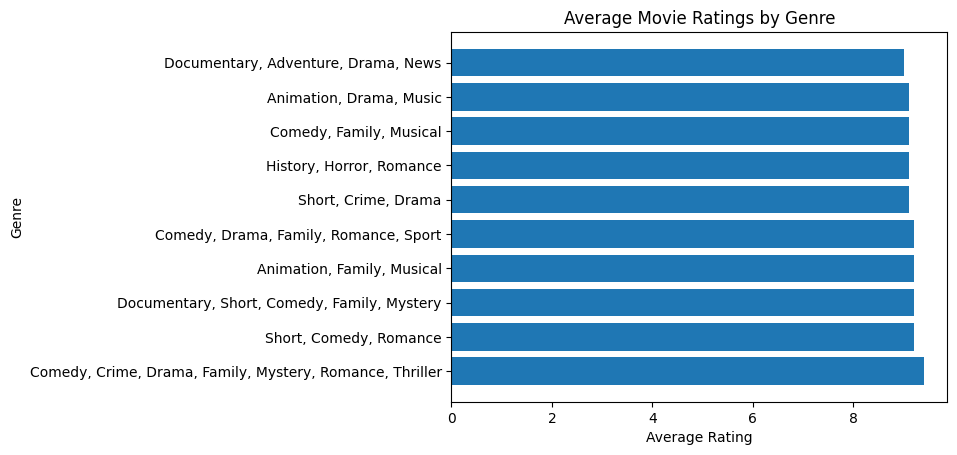

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the movies by genre and calculate the mean rating for each group
genre_mean_ratings = data.groupby('Genre')['Hidden Gem Score'].mean()

# Sort the genre mean ratings in descending order
sorted_genre_mean_ratings = genre_mean_ratings.sort_values(ascending=False)[:10]

# Create a horizontal bar plot of the genre mean ratings
plt.barh(sorted_genre_mean_ratings.index, sorted_genre_mean_ratings.values)
plt.title('Average Movie Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

best trailer site

In [24]:
import pandas as pd

# Group the media files by file format and count the number of titles in each group
file_format_counts = data.groupby('Trailer Site')['Series or Movie'].count()

# Find the file format with the highest count
most_used_file_format = file_format_counts.idxmax()
least_used_file_format = file_format_counts.idxmin()

print(f"The most used Languages in movies and TV series is {most_used_file_format}")
print(f"The least used Languages in movies and TV series is {least_used_file_format}")

The most used Languages in movies and TV series is YouTube
The least used Languages in movies and TV series is Vimeo


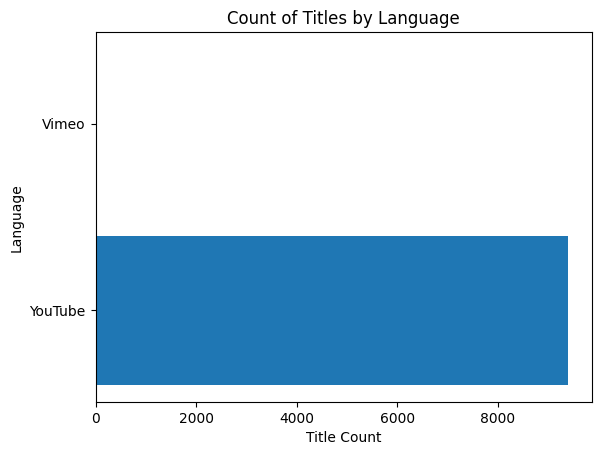

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the media files by language and count the number of titles in each group
language_counts = data.groupby('Trailer Site')['Series or Movie'].count()

# Sort the language counts in descending order
sorted_language_counts = language_counts.sort_values(ascending=False)

# Create a horizontal bar plot of the language counts
plt.barh(sorted_language_counts.index, sorted_language_counts.values)
plt.title('Count of Titles by Language')
plt.xlabel('Title Count')
plt.ylabel('Language')
plt.show()

In [26]:
# Group the movies by director and calculate the mean rating for each group
director_mean_ratings = data.groupby('Director')['Hidden Gem Score'].mean()

# Sort the director mean ratings in descending order and take the top director
top_director_mean_rating = director_mean_ratings.sort_values(ascending=False).iloc[0]

# Find the director with the highest mean rating
top_director = director_mean_ratings[director_mean_ratings == top_director_mean_rating].index[0]

# Print the director with the highest mean rating
print("The director with the most highly-rated movies is:", top_director)

The director with the most highly-rated movies is: Dorin Marcu


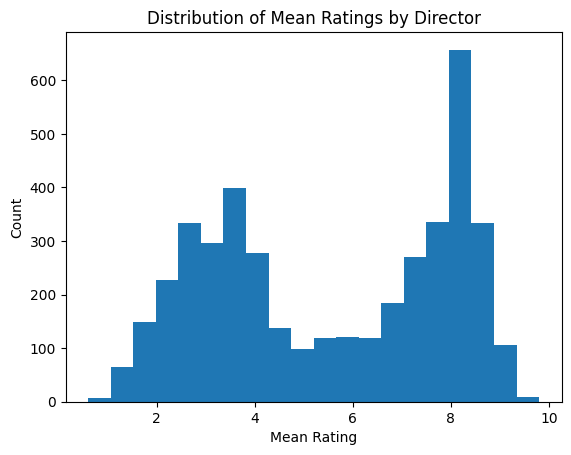

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the movies by director and calculate the mean rating for each group
director_mean_ratings = data.groupby('Director')['Hidden Gem Score'].mean()

# Create a histogram of the director mean ratings
plt.hist(director_mean_ratings, bins=20)
plt.title('Distribution of Mean Ratings by Director')
plt.xlabel('Mean Rating')
plt.ylabel('Count')
plt.show()

In [28]:
# Group the media files by year and sum the number of views for each group
year_views = data.groupby('Release Date')['IMDb Score'].sum()

# Find the year with the highest number of views
most_viewed_year = year_views.idxmax()

# Print the year with the highest number of views
print(f"The year with the highest number of views is {most_viewed_year}")

The year with the highest number of views is 21 Rmdn 2018


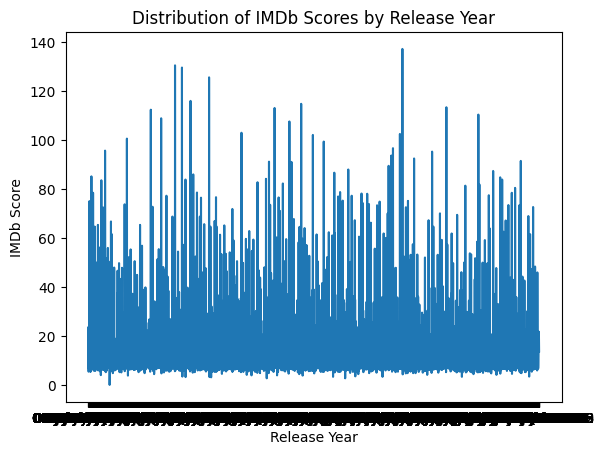

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the media files by year and sum the IMDb scores for each group
year_scores = data.groupby('Release Date')['IMDb Score'].sum()

# Create a line plotof the IMDb scores by release year
plt.plot(year_scores.index, year_scores.values)
plt.title('Distribution of IMDb Scores by Release Year')
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.show()